            Weight     Length1     Length2     Length3      Height       Width
count   159.000000  159.000000  159.000000  159.000000  159.000000  159.000000
mean    398.326415   26.247170   28.415723   31.227044    8.970994    4.417486
std     357.978317    9.996441   10.716328   11.610246    4.286208    1.685804
min       0.000000    7.500000    8.400000    8.800000    1.728400    1.047600
25%     120.000000   19.050000   21.000000   23.150000    5.944800    3.385650
50%     273.000000   25.200000   27.300000   29.400000    7.786000    4.248500
75%     650.000000   32.700000   35.500000   39.650000   12.365900    5.584500
max    1650.000000   59.000000   63.400000   68.000000   18.957000    8.142000
(159, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-nu

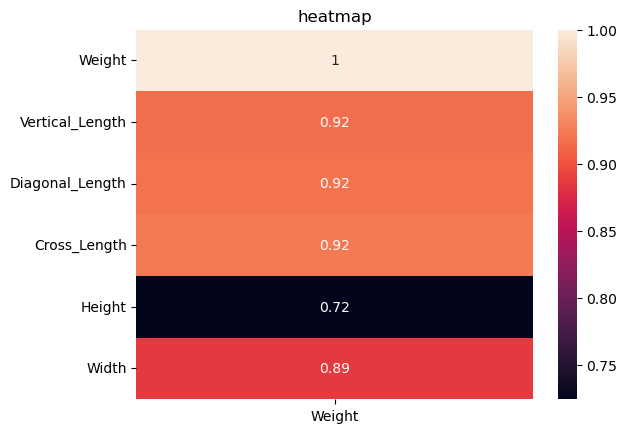

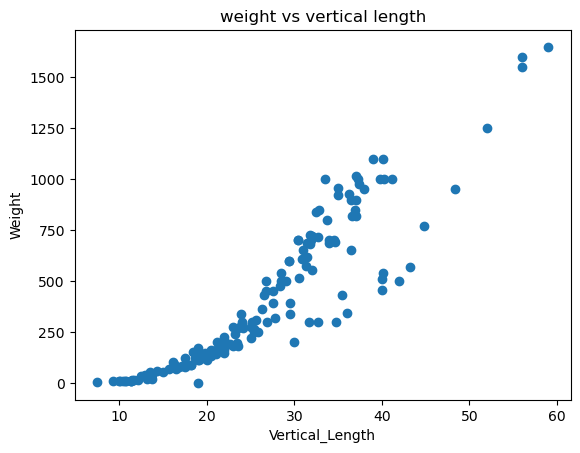

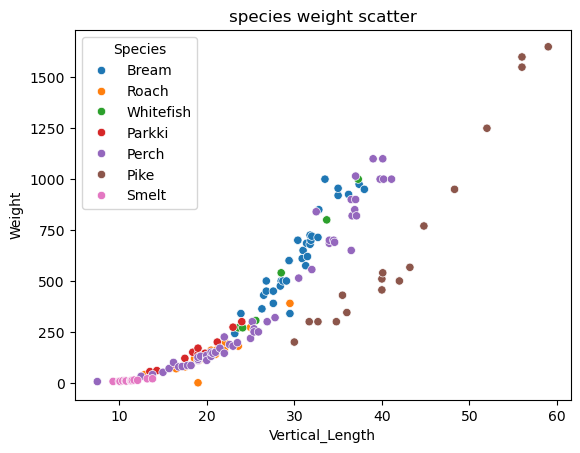

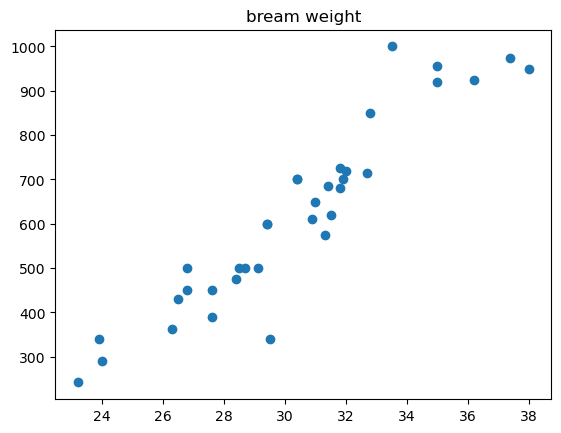

score is 0.8706754100429417


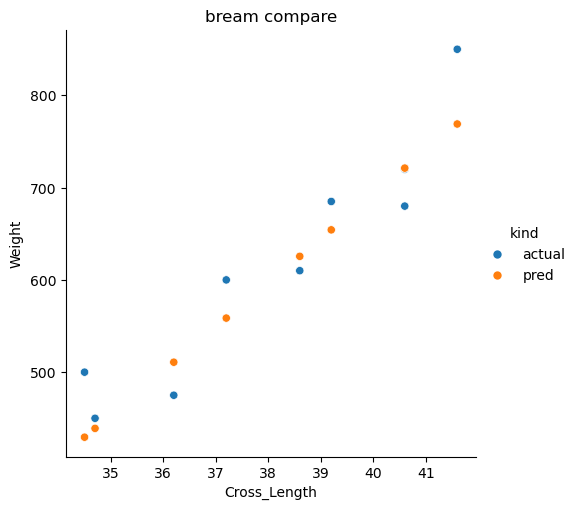

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

data = pd.read_csv('fish.csv')

print(data.describe())
print(data.shape)
data.info()

data.rename(columns={'Length1':'Vertical_Length', 'Length2':'Diagonal_Length', 'Length3':'Cross_Length'}, inplace=True)

nums = data.select_dtypes(include='number')

print(nums.corr()['Weight'])

plt.title('heatmap')
sns.heatmap(nums.corr()[['Weight']], annot=True)
plt.show()

plt.title('weight vs vertical length')
plt.scatter(data['Vertical_Length'], data['Weight'])
plt.xlabel('Vertical_Length')
plt.ylabel('Weight')
plt.show()

plt.title('species weight scatter')
sns.scatterplot(x='Vertical_Length', y='Weight', hue='Species', data=data)
plt.show()

breams = data[data['Species'] == 'Bream']
plt.scatter(breams['Vertical_Length'], breams['Weight'])
plt.title('bream weight')
plt.show()

x_col = nums.corr()['Weight'].drop('Weight').idxmax()

bream = data[data['Species'] == 'Bream']

X = bream[[x_col]]
y = bream['Weight']
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y)

model = LinearRegression()
model.fit(Xtrain, ytrain)

print("score is", model.score(Xtest, ytest))

preds = model.predict(Xtest)

results = Xtest.copy()
results['actual'] = ytest
results['pred'] = preds

melted = pd.melt(results.reset_index(), id_vars=['index', x_col], value_vars=['actual', 'pred'], var_name='kind', value_name='Weight')

sns.relplot(data=melted, x=x_col, y='Weight', hue='kind', kind='scatter')
plt.title('bream compare')
plt.show()
